# Exploratory Data Analysis

###### This part is first meeting with the dataset. Behaviours of features, relationship of features with each other will be explored and tried to understand who influance target variable, Sale Price for this project, how  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale
import statsmodels.api as sm
import pylab
from scipy.stats import shapiro
import warnings 
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data.csv")
df = df.drop("Unnamed: 0", axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,60,RL,65.0,8450,Pave,NoAll,Reg,Lvl,AllPub,Inside,...,0,0,NoP,NoF,NoM,0,2,2008,WD,208500
1,20,RL,80.0,9600,Pave,NoAll,Reg,Lvl,AllPub,FR2,...,0,0,NoP,NoF,NoM,0,5,2007,WD,181500
2,60,RL,68.0,11250,Pave,NoAll,IR1,Lvl,AllPub,Inside,...,0,0,NoP,NoF,NoM,0,9,2008,WD,223500
3,70,RL,60.0,9550,Pave,NoAll,IR1,Lvl,AllPub,Corner,...,0,0,NoP,NoF,NoM,0,2,2006,WD,140000
4,60,RL,84.0,14260,Pave,NoAll,IR1,Lvl,AllPub,FR2,...,0,0,NoP,NoF,NoM,0,12,2008,WD,250000


Text(0.5,1,'Correlation Matrix')

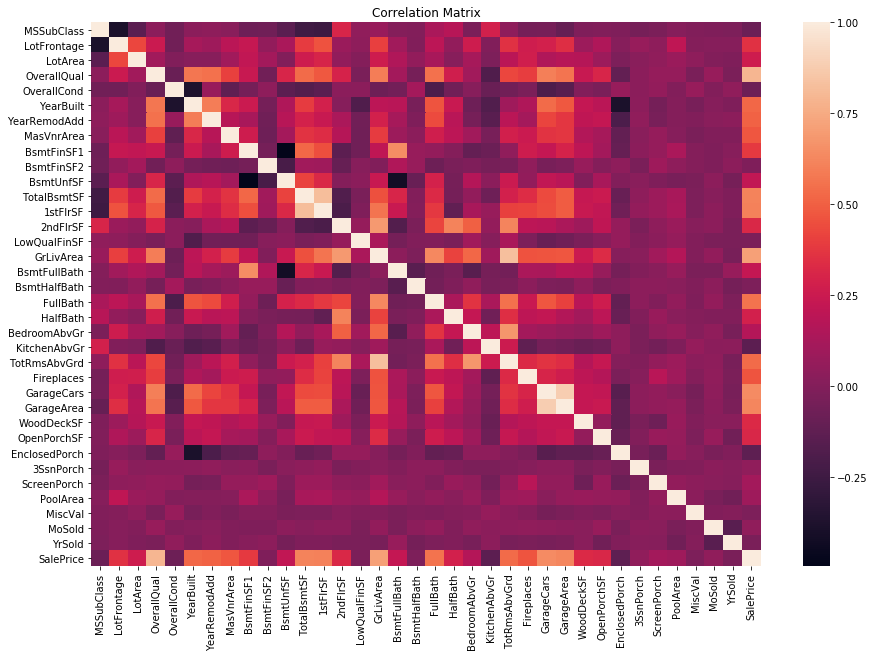

In [3]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr)
plt.title('Correlation Matrix')

Text(0.5,1,'Sale Price Distribution')

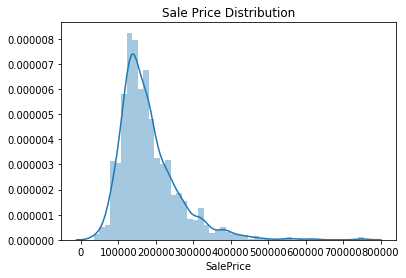

In [4]:
sns.distplot(df.SalePrice)
plt.title('Sale Price Distribution')

###### It seems that, the target variable SalePrice is distributed as Normal but right-skewed. Transformations could help to have better performance in models. 

### BUILDING

#### Lot Area

Correlation score between Sale Price and Lot Area: 0.2638433538714056


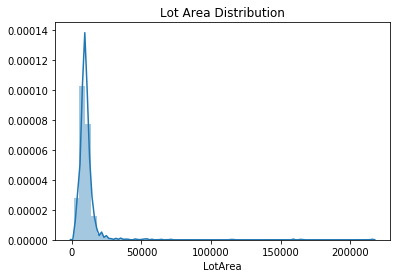

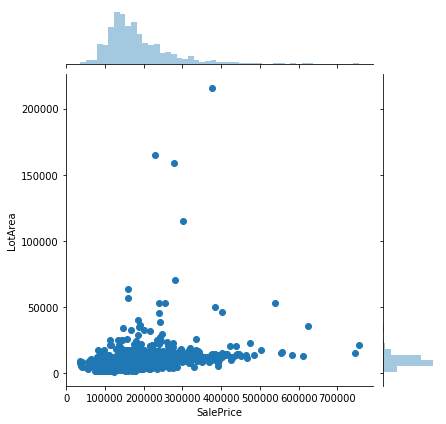

In [5]:
sns.distplot(df.LotArea).set_title('Lot Area Distribution')
sns.jointplot(df.SalePrice, df.LotArea)
print('Correlation score between Sale Price and Lot Area:', np.corrcoef(df.SalePrice,df.LotArea)[1][0])    

###### Correlation score is pretty small so linear relationship is weak, it also does not show a strong relationship with Sale price. In addition, A few outliers take attention but it does not promise to solve realitonship problem.

#### Pool

NoP    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64


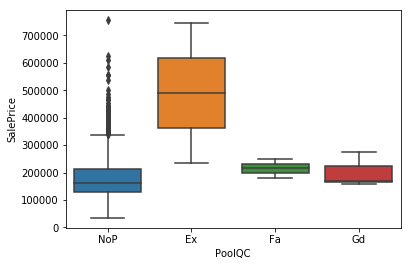

In [6]:
print(df.PoolQC.value_counts()) #atmasam mı ki
#print(df.SalePrice[df.PoolQC!="NoP"])
sns.boxplot(df.PoolQC,y=df.SalePrice)

###### PoolQC incluades 4 classes but 3 of them contains only 7 sample in total. This may not give the sufficient information to the model. It actually could have been considered to collapse these 3 classes together to get more sufficient sample size but they represent different price groups. That is why it is not a reasonable idea to apply. So drop the feature from dataset sounds better in this case. 

#### Year

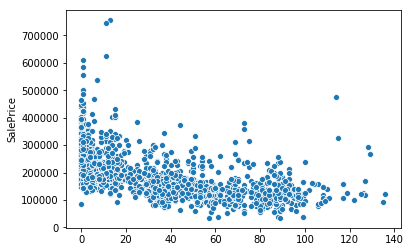

In [7]:
sns.scatterplot(y= df.SalePrice , x= (df.YrSold - df.YearBuilt))

###### Althought,  new houses seem more valuable, they does not have serious lose in value as getting older. 

#### Bathrooms

Text(0.5,1,'Number of Bathrooms')

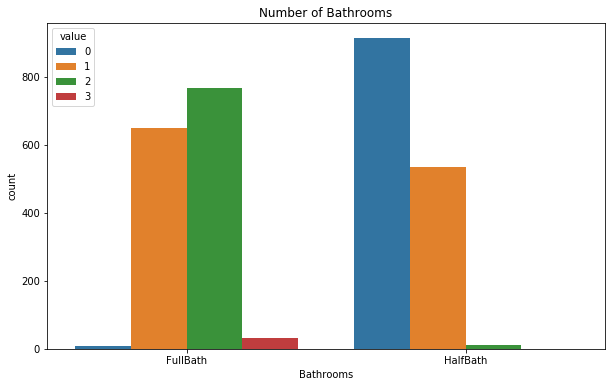

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x="variable", hue="value", data=pd.melt(df[["FullBath","HalfBath"]]))
plt.xlabel("Bathrooms")
plt.title('Number of Bathrooms')

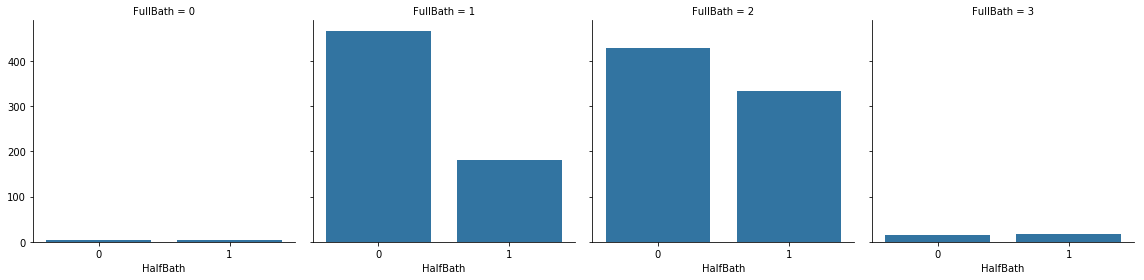

In [9]:
fig_bath = sns.FacetGrid(data=df, col="FullBath", size=4, aspect=1)
fig_bath.map(sns.countplot,"HalfBath")

#### Quality Scores

###### Overallqual states the rate of the overall material and finish of the house whereas, OverallCond states rate of the overall condition of the house

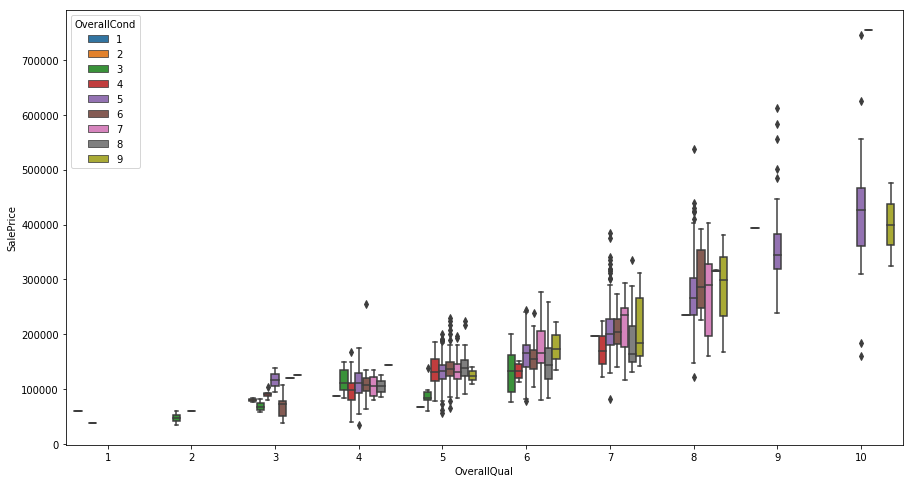

In [10]:
plt.figure(figsize=(15,8))
sns.boxplot(x="OverallQual", y="SalePrice", hue="OverallCond", data=df)

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

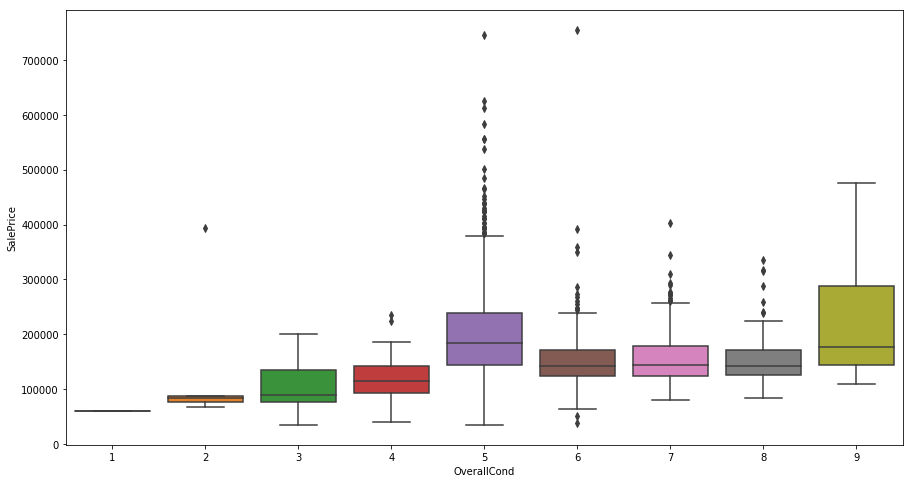

In [11]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df.OverallCond, y=df.SalePrice)
df.OverallCond.value_counts()

###### The effect of quality seem in the first garph, as expected. Surprisingly, condition does not show the same pattern as strong as quality. In addition, condition rate of 5 subverts the pattern. That is a misleading point, 5 is not a wished rate. The reason is the houses which have very high quality consist of condition rate of 9 and 5. This causes to show houses which have condition rate of 5 are more valuable.

#### Miscellaneaus !!!

NoM     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

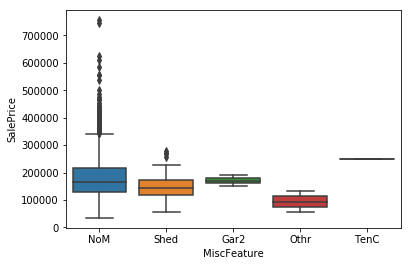

In [12]:
sns.boxplot(x=df.MiscFeature, y=df.SalePrice)
df.MiscFeature.value_counts()

###### This part shows if extra features increase the price of house. It will be misleading to interpret the classes with just a few sample such as second garage, tennis court etc. None of the classes, including Shed does not give a clue about increasing in price   

#### Foundation

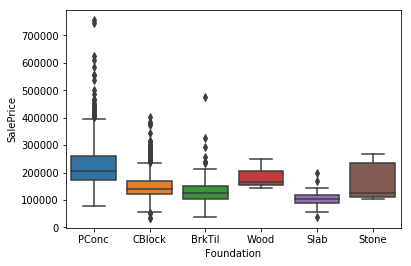

In [13]:
sns.boxplot(df.Foundation,y=df.SalePrice)

In [14]:
grg = df.GarageFinish.copy()
grg[df.GarageFinish != 'NoG'] = 1
grg[df.GarageFinish == 'NoG'] = 0

bsm = df.BsmtQual.copy()
bsm[df.BsmtQual != "NoB"] = 1
bsm[df.BsmtQual == "NoB"] = 0

pool = df.PoolQC.copy()
pool[df.PoolQC != "NoP"] = 1
pool[df.PoolQC == "NoP"] = 0

air = df.CentralAir.copy()
air[df.CentralAir == "Y"] = 1
air[df.CentralAir == "N"] = 0

In [15]:
found = pd.concat([df.Foundation, df.TotRmsAbvGrd, df.KitchenAbvGr, df.FullBath, df.HalfBath, 
           grg, bsm, air, pool, df.FullBath+df.HalfBath/2, df['1stFlrSF']+df['2ndFlrSF'], df.SalePrice] , axis=1)
group_mean = found.groupby("Foundation").mean().drop([0,1], axis=1)
group_count = found.groupby("Foundation").count()[1]
group_count.name = 'count'
pd.concat([group_mean, group_count], axis=1)

,TotRmsAbvGrd,KitchenAbvGr,FullBath,HalfBath,SalePrice,count
Foundation,,,,,,
BrkTil,6.554795,1.075342,1.328767,0.212329,132291.075342,146
CBlock,6.134069,1.056782,1.324921,0.329653,149805.714511,634
PConc,6.868624,1.012365,1.850077,0.488408,225230.442040,647
Slab,6.500000,1.458333,1.666667,0.000000,107365.625000,24
Stone,8.166667,1.333333,1.500000,0.166667,165959.166667,6
Wood,7.000000,1.000000,1.666667,0.666667,185666.666667,3


###### Expectedly, houses founded by wood and stone seem less likely so their statistics may not be steady. Apart from these two classes, most common foundation type, Poured Contrete(PConc), has the highest mean Sale price and it seems the most functional type according to total room and bathroom numbers. The point is even if foundation type Cinder block (CBlock) allows less functionality than Brick and Tile (BrkTil), cinder block type of foundation is more expensive and common.

#### Garage

Text(0.5,1,'Pie Chart of Condition of Garage Completion')

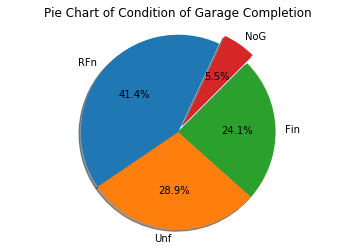

In [16]:
plt.pie(df.GarageFinish.value_counts(), labels=df.GarageFinish.unique(),
        autopct='%1.1f%%', startangle=65, explode=(0,0,0,0.1), shadow=True)        
plt.axis('equal')
plt.title('Pie Chart of Condition of Garage Completion')

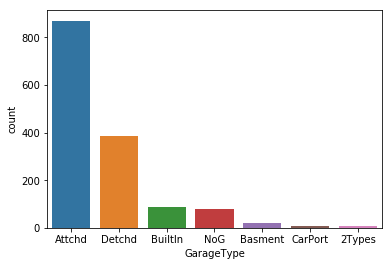

In [17]:
sns.countplot(df.GarageType, order=df.GarageType.value_counts().index)

Text(0.5,1,'Violin Plot Garage Type and Sale Price')

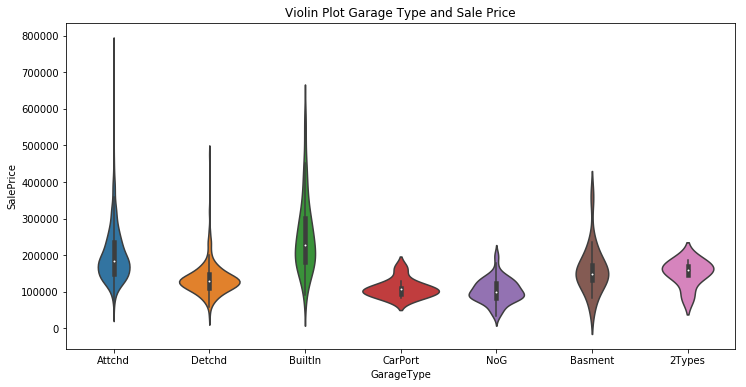

In [18]:
plt.figure(figsize=(12,6))
sns.violinplot(x="GarageType", y="SalePrice", data=df )
plt.title('Violin Plot Garage Type and Sale Price')

array(['TA', 'Fa', 'Gd', 'NoG', 'Ex', 'Po'], dtype=object)

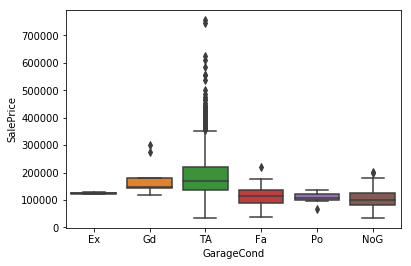

In [19]:
sns.boxplot(x=df.GarageCond, y=df.SalePrice, order=["Ex","Gd","TA","Fa","Po","NoG"])
df.GarageCond.value_counts()
df.GarageQual.unique()

185    475000
268    120500
760    127500
Name: SalePrice, dtype: int64

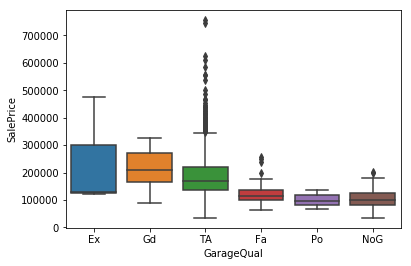

In [20]:
sns.boxplot(x=df.GarageQual, y=df.SalePrice, order=["Ex","Gd","TA","Fa","Po","NoG"])
df.SalePrice[df.GarageQual == "Ex"]

#### Basement

Text(0.5,1,'Sale Price vs Basement Finished sq')

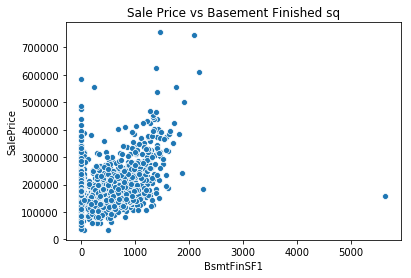

In [21]:
sns.scatterplot(x=df.BsmtFinSF1, y=df.SalePrice).set_title('Sale Price vs Basement Finished sq')

In [22]:
data = df.copy()
data.drop([1298],axis=0, inplace = True)

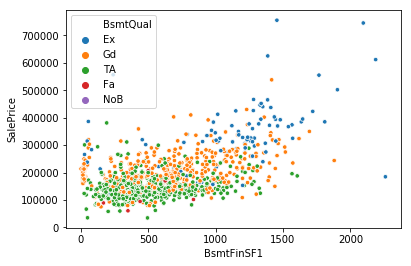

In [23]:
sns.scatterplot(x=data.BsmtFinSF1[df.BsmtFinSF1 != 0], y=data.SalePrice[df.BsmtFinSF1 != 0], hue=data.BsmtQual, hue_order=["Ex","Gd","TA","Fa","NoB"], 
                marker="o", s=20)       

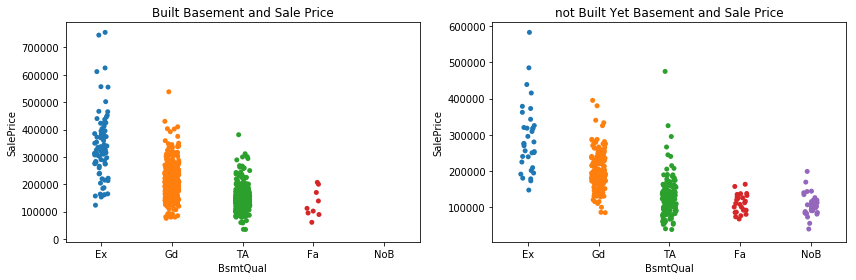

In [24]:
fig , ax = plt.subplots(1,2, figsize=(12,4))
sns.stripplot(x=df.BsmtQual[df.BsmtFinSF1 != 0], y=df.SalePrice[df.BsmtFinSF1 != 0], order=["Ex","Gd","TA","Fa","NoB"], ax=ax[0])  
ax[0].set_title('Built Basement and Sale Price')
sns.stripplot(x=df.BsmtQual[df.BsmtFinSF1 == 0], y=df.SalePrice[df.BsmtFinSF1 == 0], order=["Ex","Gd","TA","Fa","NoB"], ax=ax[1])   
ax[1].set_title('not Built Yet Basement and Sale Price')
plt.tight_layout()

###### Basement size and quality directly affects Sale Price and also exponentially. So it can be deduced that people desire to have a nice basement in their home since price of houses high even if basement has not been built yet

### Envirenment

#### Zoning Classes

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

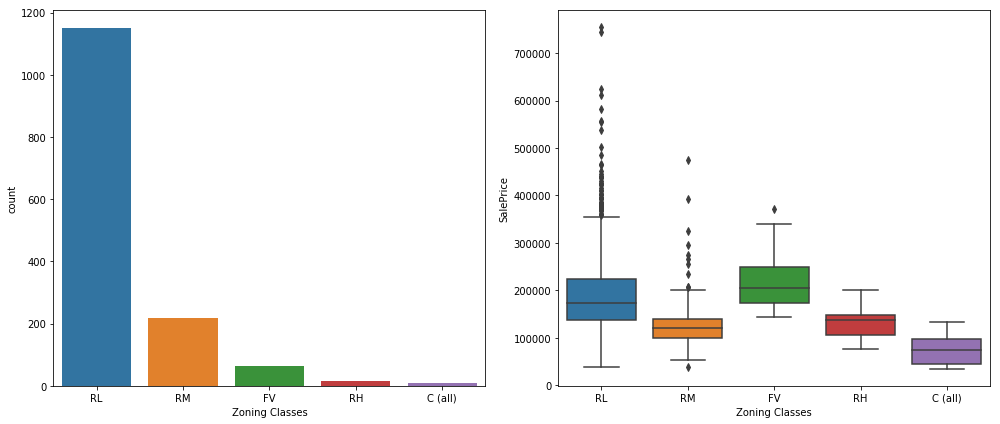

In [25]:
fig_zon, ax_zon = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

sns.countplot(df.MSZoning, order=df.MSZoning.value_counts().index,ax=ax_zon[0])
ax_zon[0].set_xlabel("Zoning Classes")

sns.boxplot(x=df.MSZoning, y=df.SalePrice, ax=ax_zon[1], order=df.MSZoning.value_counts().index)   
ax_zon[1].set_xlabel("Zoning Classes")

plt.tight_layout()
df.MSZoning.unique()

###### In this dataset, people attach importance and prefer to live in tranquil zones like Residental Low Density (RL) and Floating Village Residental (FV) rather than living in crowded zonesResidental High Density(RH) and Commercial(C)

#### Neighborhood

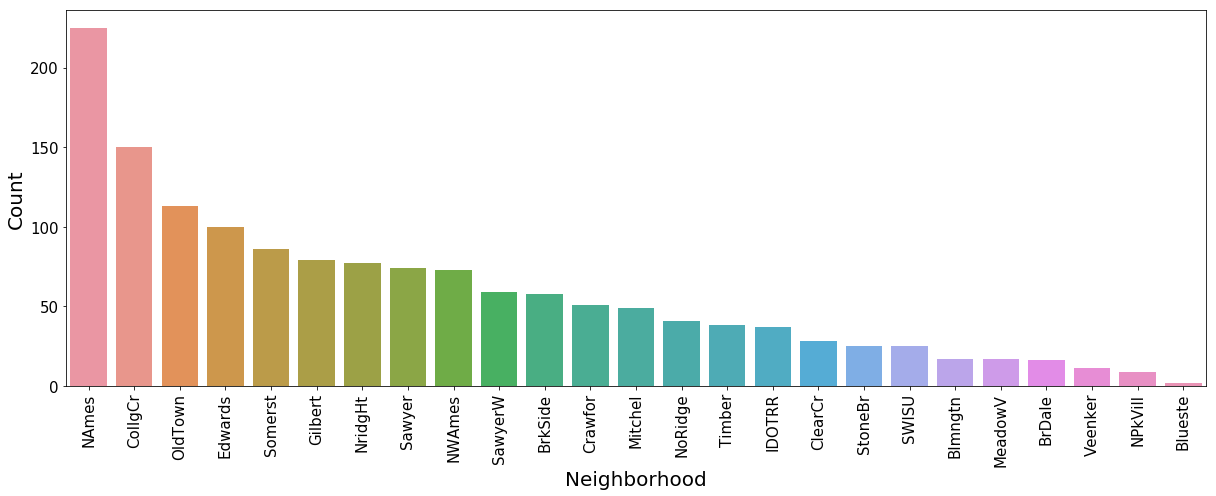

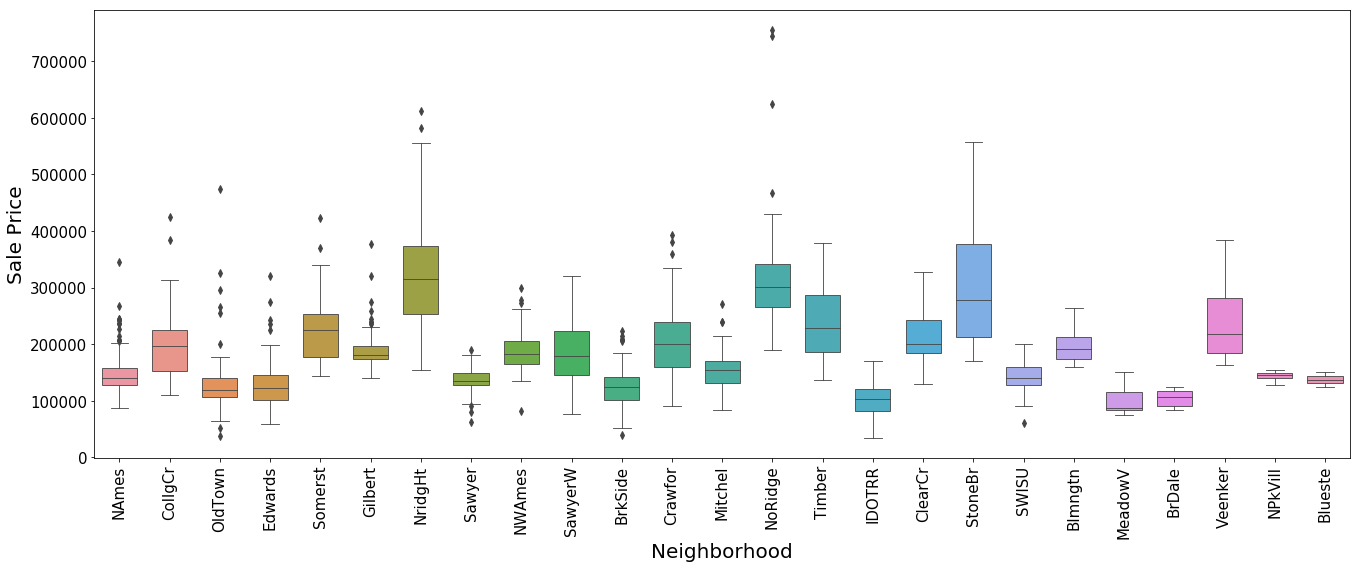

In [26]:
plt.figure(figsize=(17,7))
sns.countplot(df.Neighborhood, order=df.Neighborhood.value_counts().index)
plt.xticks(rotation=90)  
plt.tick_params(labelsize=15)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Neighborhood",fontsize=20)
plt.tight_layout()

df.Neighborhood.value_counts()

plt.figure(figsize=(19,8))
sns.boxplot(y=df.SalePrice, x=df.Neighborhood, width=0.7, linewidth = 0.85,
            order=df.Neighborhood.value_counts().index)
plt.xticks(rotation=90)   
plt.tick_params(labelsize=15)
plt.ylabel("Sale Price",fontsize=20)
plt.xlabel("Neighborhood",fontsize=20)
plt.tight_layout()


###### These classes can be seperated into a couple of group like Low-Medium-High Income Neighborhood. There is a rough seperation in the following cells to examine if price depends on house quality or any other variable
###### As a reminder, in functionality feature deductions are mentioned as major, moderate, minor1, minor2 and if no deduction Typical is mentioned

Typ     141
Mod       1
Min1      1
Name: Functional, dtype: int64

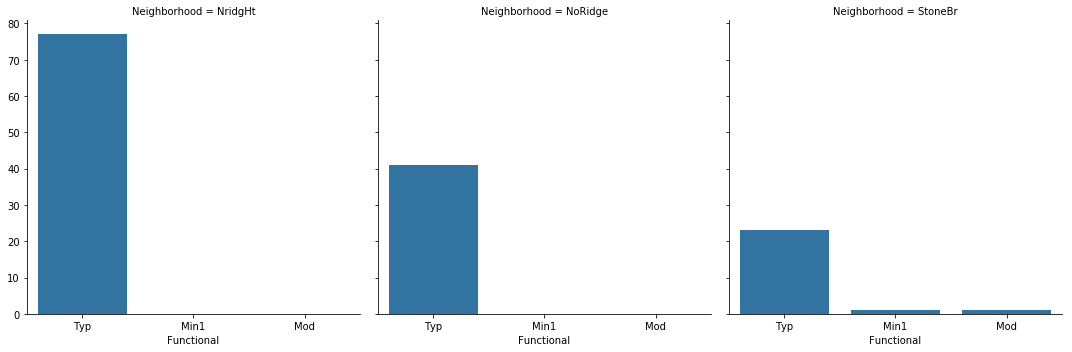

In [27]:
df_nb = df[((df.Neighborhood == "NridgHt") |( df.Neighborhood == "NoRidge") | (df.Neighborhood == "StoneBr"))]
fig_nb = sns.FacetGrid(data=df_nb, col="Neighborhood", height=5, margin_titles=True,
                       col_order = df_nb.Neighborhood.value_counts().index)          
fig_nb.map(sns.countplot, "Functional") 
plt.tight_layout()
df_nb.Functional.value_counts()


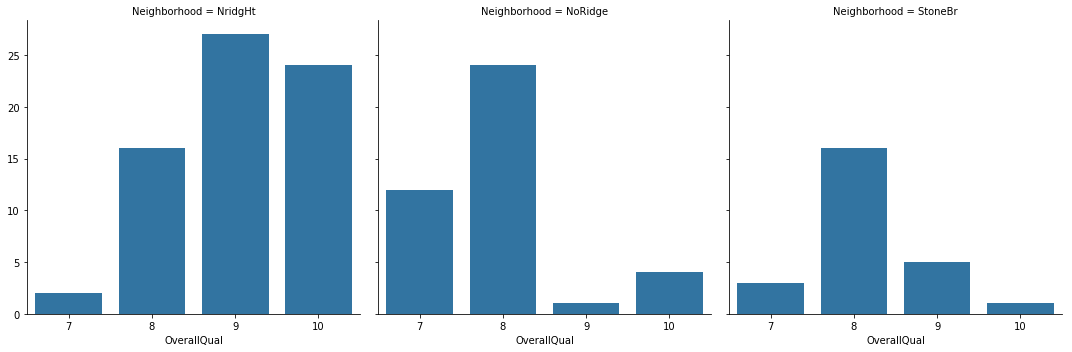

In [28]:
fig_nb = sns.FacetGrid(data=df_nb, col="Neighborhood", height=5, margin_titles=True,
                       col_order = df_nb.Neighborhood.value_counts().index)          
fig_nb.map(sns.countplot, "OverallQual") 
plt.tight_layout()
#percent lazııım

###### In the first group, high income group, there is almost no deduction and quality of houses are pretty high 

Typ     270
Min2     14
Mod       7
Min1      7
Maj1      7
Maj2      3
Name: Functional, dtype: int64

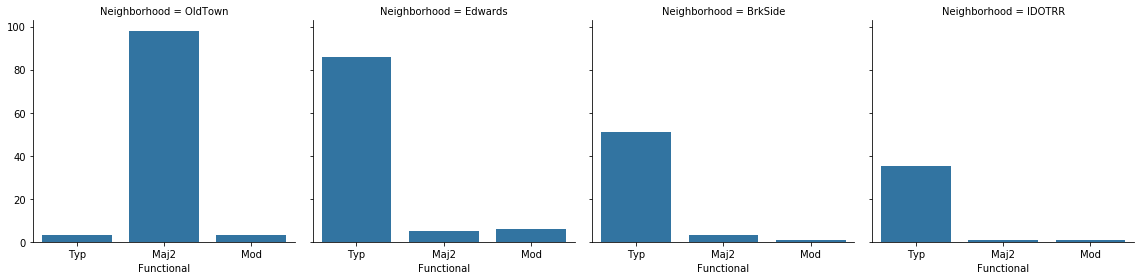

In [29]:
df_nb2 = df[((df.Neighborhood == "OldTown") |( df.Neighborhood == "Edwards") | (df.Neighborhood == "BrkSide") | (df.Neighborhood == "IDOTRR"))]            
fig_nb2 = sns.FacetGrid(data=df_nb2, col="Neighborhood", height=4, margin_titles=True,
                       col_order = df_nb2.Neighborhood.value_counts().index)          
fig_nb2.map(sns.countplot, "Functional") 
plt.tight_layout()
df_nb2.Functional.value_counts()

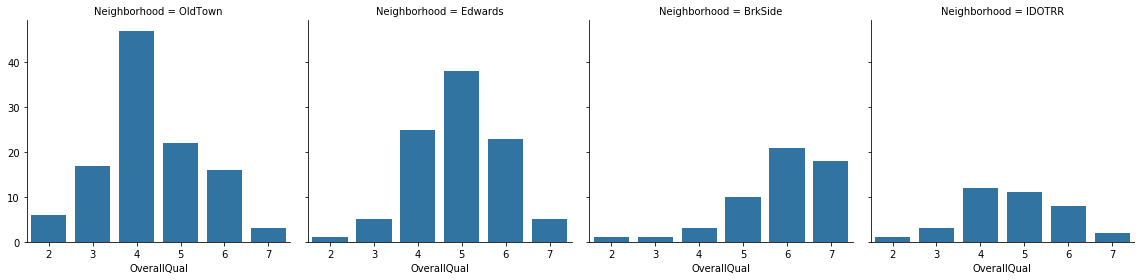

In [30]:
fig_nb2 = sns.FacetGrid(data=df_nb2, col="Neighborhood", height=4, margin_titles=True,
                       col_order = df_nb2.Neighborhood.value_counts().index)          
fig_nb2.map(sns.countplot, "OverallQual") 
plt.tight_layout()

###### In the second group, deductions are more common and quality scores also decreased. However, there could be a exception for Brookside(BrkSide) since it's deduction and quality scores looks better tahn the others. Generally in non-preferable or developing zones, houses are built above average but they lose thir actual value because of the zone